# 시계열 데이터를 다뤄보자 

### Numpy의 polyfit으로 회귀(regression) 분석하기

In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c conda-forge fbprophet

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\B0110\Anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    convertdate-2.1.3          |          py_1000          30 KB  conda-forge
    ephem-3.7.7.0              |   py37hfa6e2cd_0         722 KB  conda-forge
    fbprophet-0.5              |   py37h6538335_0         520 KB  conda-forge
    holidays-0.9.11            |             py_0          39 KB  conda-forge
    libpython-2.0              |           py37_0          47 KB  conda-forge
    lunardate-0.2.0            |             py_0          21 KB  conda-forge
    m2w64-binutils-2.25.1      |                5        44.3 MB
    m2w64-bzip2-1.0.6          |                6         100 KB
    m2w64-crt-git-5.0.0.4636.2595836|                2         3.4 MB
    m2w64-gcc-5.3.0            |  

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
path = 'c:/Windows/Fonts/malgun.ttf'
import platform
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

In [3]:
pinkwink_web = pd.read_csv('data/08. PinkWink Web Traffic.csv', encoding='utf-8', thousands=',', names=['date', 'hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


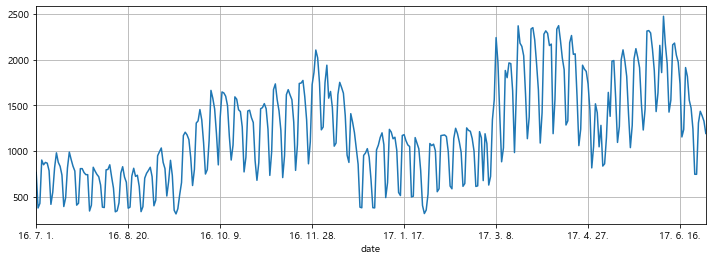

In [4]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

In [5]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [6]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [7]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.6284101894695
429.53280466762925
330.4777304274343


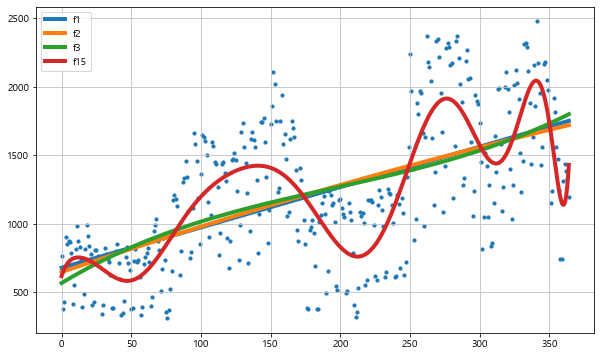

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

### Prophet 모듈을 이용한 forecast 예측

In [9]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='%y. %m. %d.')
del df['date']

m = Prophet(yearly_seasonality=True)
m.fit(df);

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,912.761130,709.550358,1127.167723
421,2017-08-26,497.711704,292.421469,698.108900
422,2017-08-27,630.268176,429.586937,839.248066
423,2017-08-28,1182.888299,977.637042,1389.531681
424,2017-08-29,1218.800002,1004.743774,1424.532569


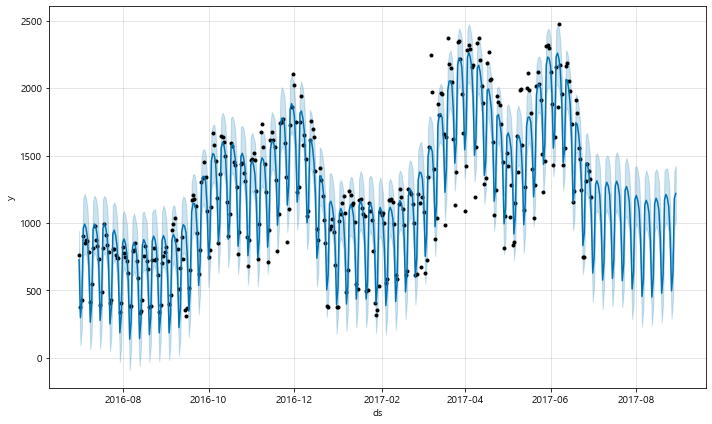

In [12]:
m.plot(forecast);

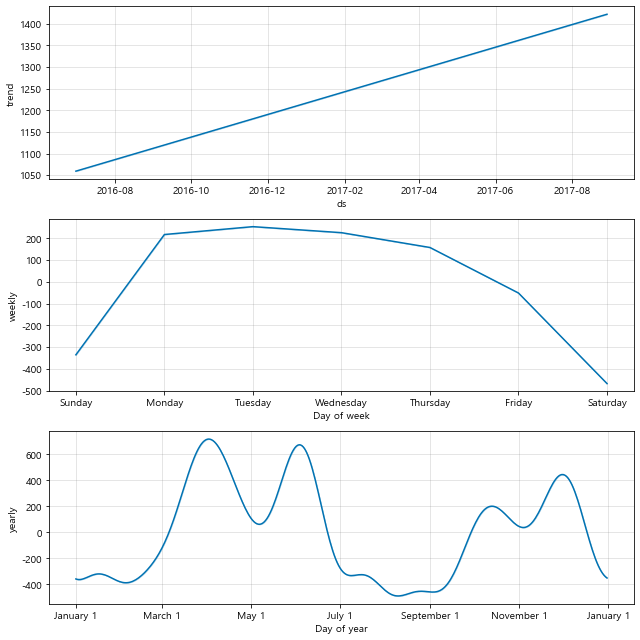

In [13]:
m.plot_components(forecast);

### Seasonal 시계열 분석으로 주식 데이터 분석하기

In [28]:
pip install yfinance

  Using cached https://files.pythonhosted.org/packages/c2/31/8b374a12b90def92a4e27d0fc595fc43635f395984e36a075244d98bd265/yfinance-0.1.54.tar.gz
  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22414 sha256=ec8b25b028bd7fa000ec621819bee4080152b3f6fba3b4bd19e5dd190b04b8a6
  Stored in directory: C:\Users\B0110\AppData\Local\pip\Cache\wheels\f9\e3\5b\ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
  Created wheel for multitasking: filename=multitasking-0.0.9-cp37-none-any.whl size=8373 sha256=abf48d454198d9723f9b4663c843ba7791160ade84a7109f72910af2ede8e99c
  Stored in directory: C:\Users\B0110\AppData\Local\pip\Cache\wheels\37\fa\73\d492849e319038eb4d986f5152e4b19ffb1bc0639da84d2677
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [14]:
from pandas_datareader import data
import yfinance as yf
yf.pdr_override()

start = datetime(2003, 1, 1)
end = datetime(2017, 6, 30)
KIA = data.get_data_yahoo('000270.KS', start, end)
    
# KIA = web.DataReader('KRX:000270','google',start,end) # 구글용... 동작이 안됨
# KIA = web.DataReader('000270.KS','yahoo',start,end) # 구글용... 동작이 안됨
KIA.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-02,9000.0,9200.0,8950.0,9190.0,9190.0,688900
2003-01-03,9350.0,9720.0,9330.0,9550.0,9550.0,1419800
2003-01-06,9720.0,9760.0,9500.0,9700.0,9700.0,1076300
2003-01-07,9900.0,9920.0,9420.0,9420.0,9420.0,1034100
2003-01-08,9500.0,9740.0,9400.0,9520.0,9520.0,599800


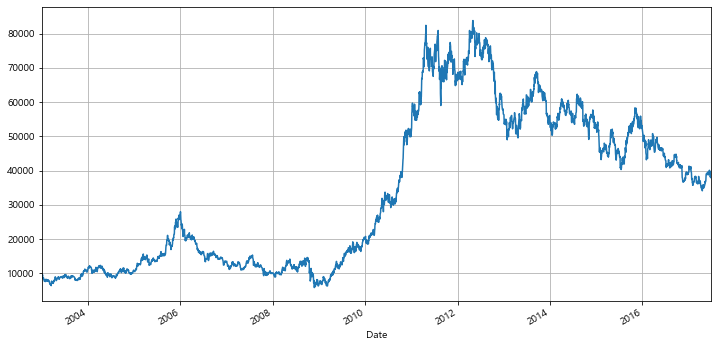

In [15]:
KIA['Close'].plot(figsize=(12,6), grid=True);

In [16]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-02,9000.0,9200.0,8950.0,9190.0,9190.0,688900
2003-01-03,9350.0,9720.0,9330.0,9550.0,9550.0,1419800
2003-01-06,9720.0,9760.0,9500.0,9700.0,9700.0,1076300
2003-01-07,9900.0,9920.0,9420.0,9420.0,9420.0,1034100
2003-01-08,9500.0,9740.0,9400.0,9520.0,9520.0,599800
...,...,...,...,...,...,...
2016-12-23,38700.0,39350.0,38650.0,39100.0,39100.0,1070783
2016-12-26,39100.0,39350.0,38850.0,39000.0,39000.0,465612
2016-12-27,39050.0,39700.0,39050.0,39500.0,39500.0,879686


In [17]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2003-01-02,9190.0
1,2003-01-03,9550.0
2,2003-01-06,9700.0
3,2003-01-07,9420.0
4,2003-01-08,9520.0


In [18]:
m = Prophet()
m.fit(df);

future = m.make_future_dataframe(periods=365)
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
3832,2017-12-25
3833,2017-12-26
3834,2017-12-27
3835,2017-12-28
3836,2017-12-29


In [19]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3832,2017-12-25,34453.768622,24427.784349,44686.204350
3833,2017-12-26,34491.044584,24278.944171,44455.350089
3834,2017-12-27,34454.314284,24643.270025,44761.749946
3835,2017-12-28,34397.569685,24172.136607,45284.887785
3836,2017-12-29,34304.374241,23740.041185,44051.188384


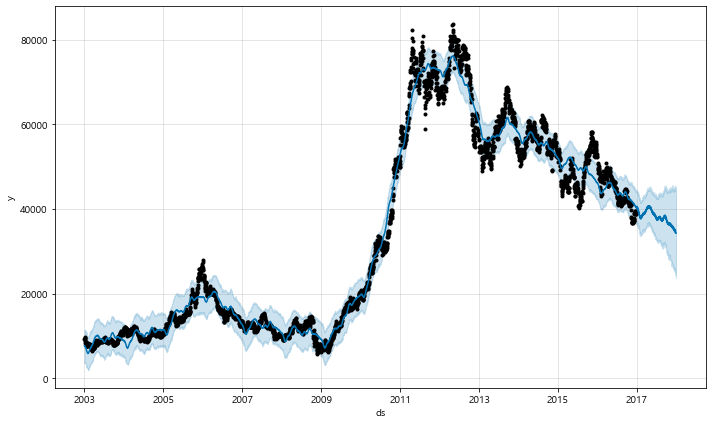

In [20]:
m.plot(forecast);

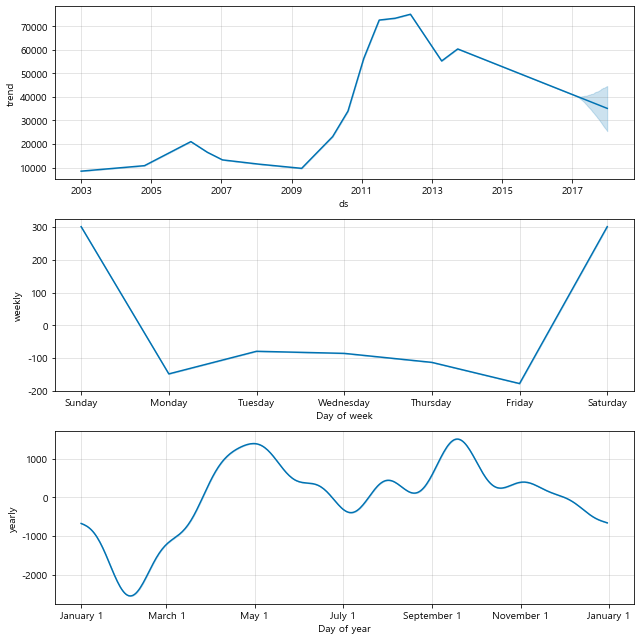

In [21]:
m.plot_components(forecast);

In [24]:
start = datetime(2014, 1, 1) 
end = datetime(2017, 7, 31)
KIA = data.get_data_yahoo('000270.KS', start, end)
KIA.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,56200.0,56300.0,52300.0,52700.0,52700.0,3333908
2014-01-03,53200.0,53400.0,52000.0,52700.0,52700.0,1793537
2014-01-06,52900.0,53300.0,51300.0,52500.0,52500.0,2504523
2014-01-07,52200.0,54200.0,52200.0,54000.0,54000.0,2081098
2014-01-08,54100.0,54300.0,53300.0,53900.0,53900.0,1353618


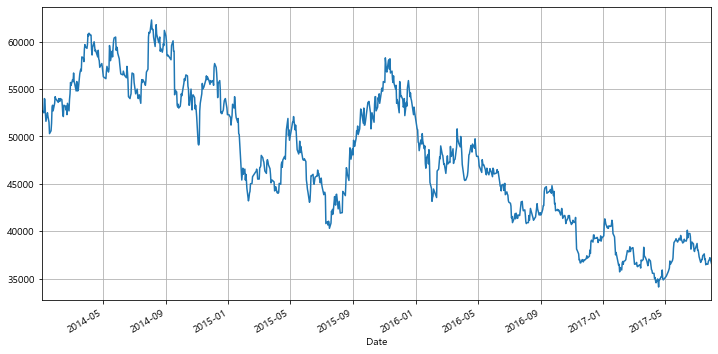

In [25]:
KIA['Close'].plot(figsize=(12,6), grid=True);

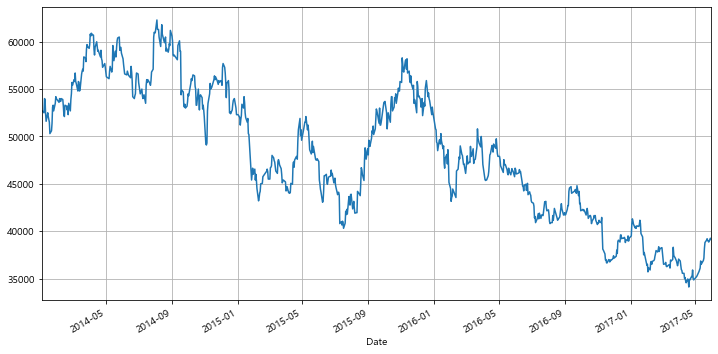

In [26]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True);

In [27]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [28]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


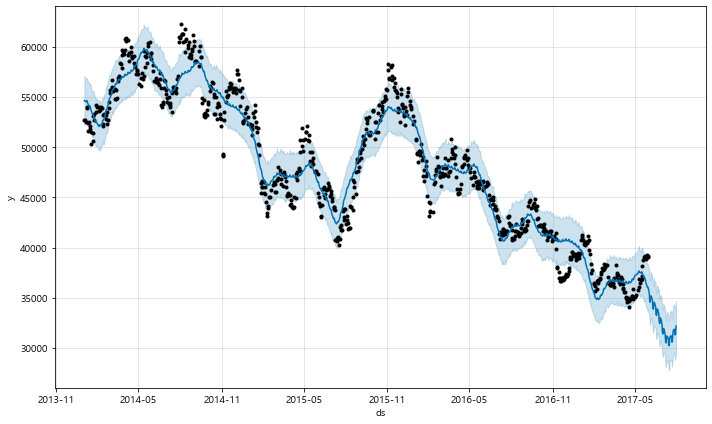

In [31]:
forecast = m.predict(future)
m.plot(forecast);

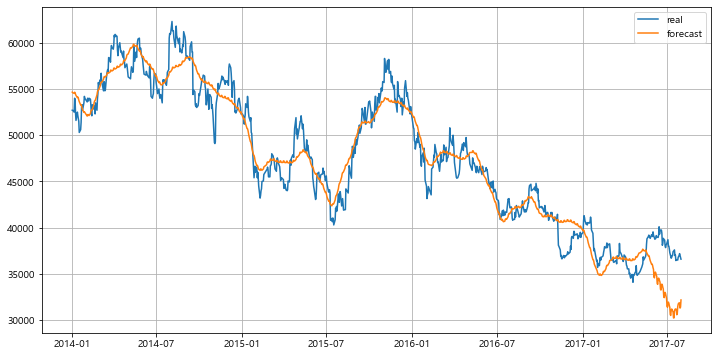

In [32]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

### Growth Model과 Holiday Forecast

In [34]:
df = pd.read_csv('data/08. example_wp_R.csv')
df.head()

,ds,y
0,2008-01-30,394
1,2008-01-16,424
2,2008-01-17,408
3,2008-01-14,385
4,2008-01-15,369


In [35]:
df['y'] = np.log(df['y'])

In [36]:
df['cap'] = 8.5

In [37]:
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


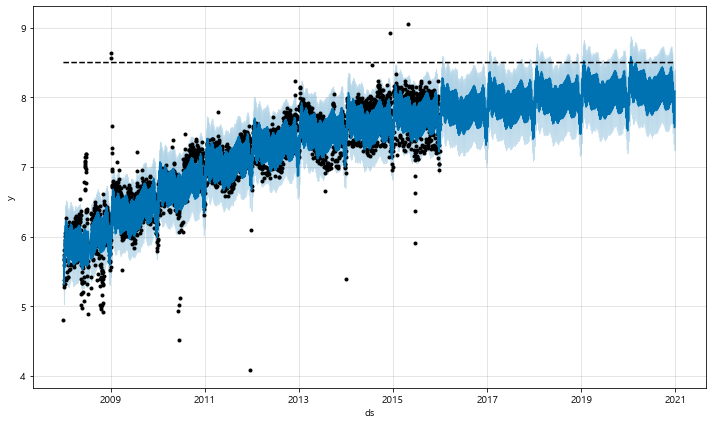

In [38]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

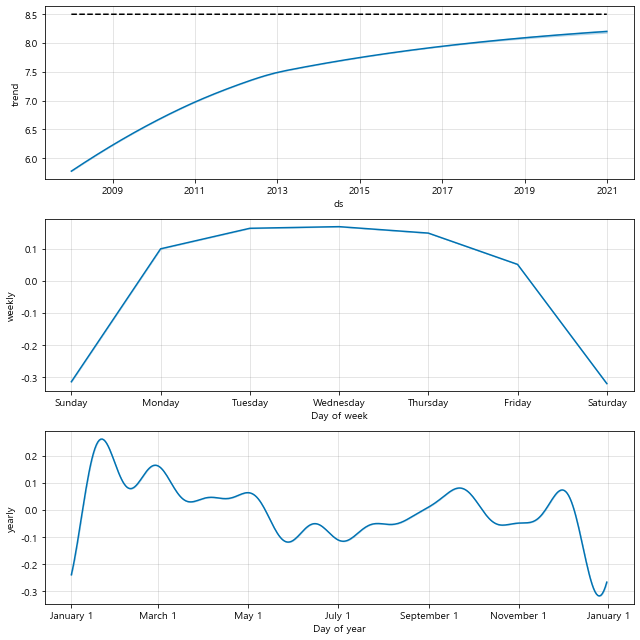

In [39]:
forecast = m.predict(future)
m.plot_components(forecast);